In [108]:
from src.dataset import Dataset
import torch.utils.data
from torch.utils.data import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import KFold

# Einlesen Daten und plotten

In [109]:
traindataset= Dataset(r"raw_data\ZueriCrop\ZueriCrop.hdf5", 0., 'train', False, 1, "labels.csv", num_channel=4, apply_cloud_masking=False,small_train_set_mode=False)
traindataloader = torch.utils.data.DataLoader(traindataset, batch_size=100, shuffle=True, num_workers=0)

5fold:  1   Mode:  train
Dataset size:  27977
Valid dataset size:  22382
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20


In [110]:
for iteration, data in enumerate(next(iter(traindataloader))):
    data_i = data
    print(data_i[0].shape)


torch.Size([71, 4, 24, 24])
torch.Size([24, 24])
torch.Size([24, 24])
torch.Size([24, 24])


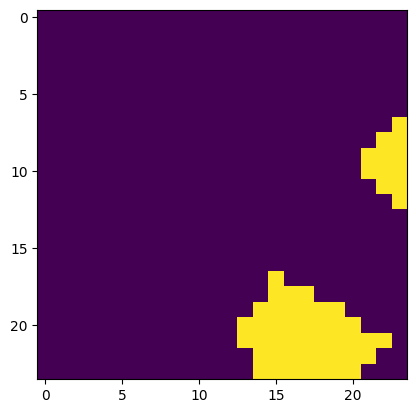

In [149]:
plt.imshow(data_i[0], cmap='viridis', interpolation='nearest')

In [160]:
splits=KFold(n_splits=5,shuffle=True,random_state=42)

In [177]:
for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(traindataset)))):

    print('Fold {}'.format(fold + 1))
    train_sampler = SubsetRandomSampler(train_idx)
    train_loader = torch.utils.data.DataLoader(traindataset, batch_size=3580, sampler=train_sampler)
    

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [190]:
classes_kfold = []
for iteration, data in enumerate(iter(train_loader)):
    data_j = data
    classes_kfold.append(data_j[1].unique(return_counts=True))
    print(data_j[0].shape)
    

torch.Size([3580, 71, 4, 24, 24])
torch.Size([3580, 71, 4, 24, 24])
torch.Size([3580, 71, 4, 24, 24])
torch.Size([3580, 71, 4, 24, 24])
torch.Size([3580, 71, 4, 24, 24])
torch.Size([6, 71, 4, 24, 24])


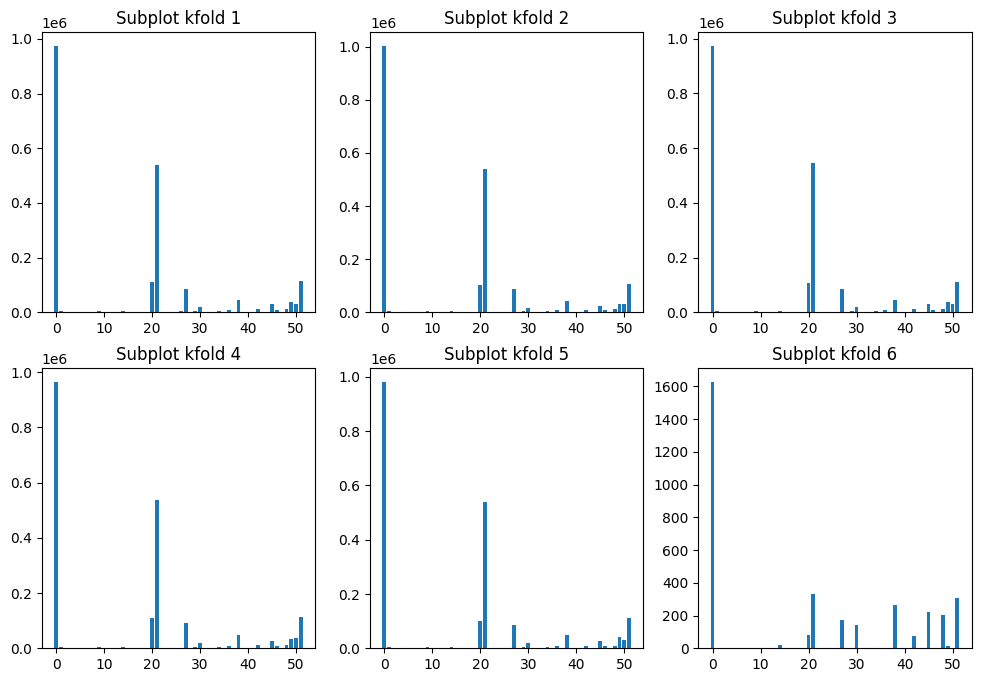

In [207]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(classes_kfold):
            axs[i, j].bar(classes_kfold[index][0], classes_kfold[index][1])
            axs[i, j].set_title(f'Subplot kfold {index+1}')